In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('../input/polycsv/poly.csv')

In [250]:
def train_test_split(data):
    mask = np.random.rand(len(data)) <= 0.7
    training_data = data[mask]
    testing_data = data[~mask]

    print(f"No. of training examples: {training_data.shape[0]}")
    print(f"No. of testing examples: {testing_data.shape[0]}")
    return training_data, testing_data

In [251]:
training_data, test_data = train_test_split(data)
x = training_data.values[:,0]
y = training_data.values[:,1]
x_test = test_data.values[:,0]
y_test = test_data.values[:,1]

No. of training examples: 217
No. of testing examples: 83


In [252]:
def get_r2_numpy_corrcoef(x, y):
    return np.corrcoef(x, y)[0, 1]**2

R2-scores for Degree 1
In-sample error(r2_score): 0.00010203739691085614
Out-of-sample error(r2_score): 0.009298868637864728


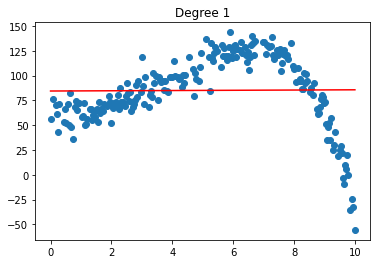

R2-scores for Degree 2
In-sample error(r2_score): 0.6248547447486951
Out-of-sample error(r2_score): 0.6168180073659486


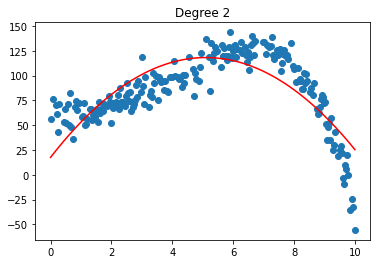

R2-scores for Degree 3
In-sample error(r2_score): 0.9030308123072923
Out-of-sample error(r2_score): 0.8905706273078773


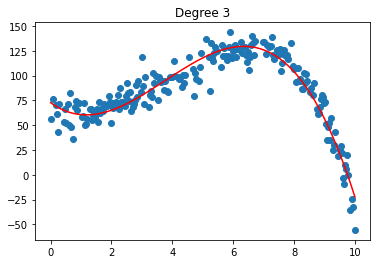

R2-scores for Degree 4
In-sample error(r2_score): 0.918955433975643
Out-of-sample error(r2_score): 0.9050154079116075


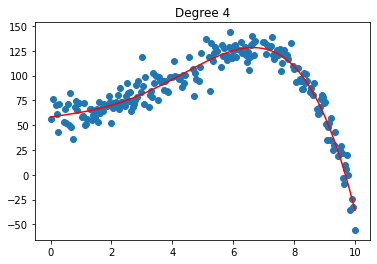

R2-scores for Degree 5
In-sample error(r2_score): 0.9201359280682664
Out-of-sample error(r2_score): 0.9043915834792338


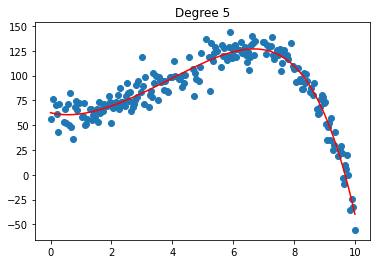

R2-scores for Degree 6
In-sample error(r2_score): 0.9203627011518408
Out-of-sample error(r2_score): 0.9024034112395233


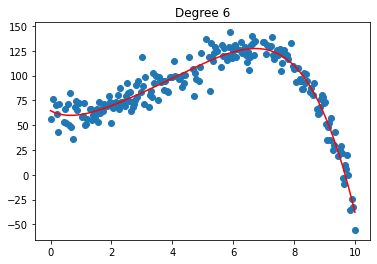

R2-scores for Degree 7
In-sample error(r2_score): 0.9211223861977816
Out-of-sample error(r2_score): 0.9017336411186067


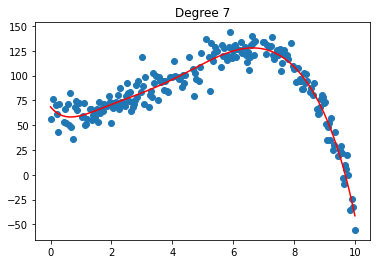

R2-scores for Degree 8
In-sample error(r2_score): 0.9224668792952202
Out-of-sample error(r2_score): 0.9022751771082291


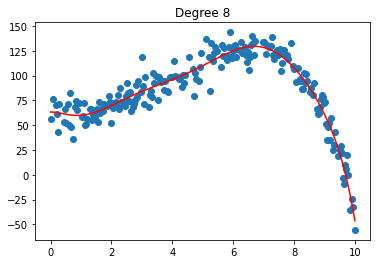

R2-scores for Degree 9
In-sample error(r2_score): 0.9224767354885088
Out-of-sample error(r2_score): 0.9021951780302422


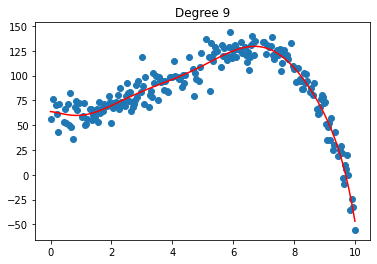

R2-scores for Degree 10
In-sample error(r2_score): 0.9226662317891522
Out-of-sample error(r2_score): 0.9039904398196804


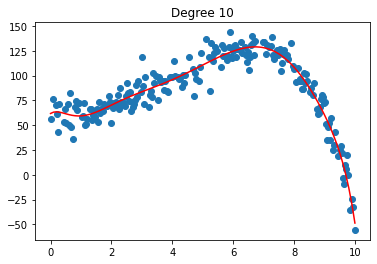

Best out-of-sample error(r2_score): {'deg': 4, 'r2': 0.9050154079116075}, because it doesn't overfit yet, but result depends on the test set too much (my train-test split is far from optimal).


In [253]:
best_out = {"deg":0,"r2":0}
for deg in range(10):
    mymodel = np.poly1d(np.polyfit(x, y, deg+1))
    print(f"R2-scores for Degree {deg+1}")
    err_in = get_r2_numpy_corrcoef(mymodel(x),y)
    err_out = get_r2_numpy_corrcoef(mymodel(x_test),y_test)
    if err_out > best_out["r2"]:
        best_out["deg"] = deg+1
        best_out["r2"] = err_out
    print(f"In-sample error(r2_score): {err_in}")
    print(f"Out-of-sample error(r2_score): {err_out}")
    plt.scatter(x,y)
    myline = np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 100)
    plt.plot(myline, mymodel(myline),'r')
    plt.title(f"Degree {deg+1}")
    plt.show()

print(f"Best out-of-sample error(r2_score): {best_out}, because it doesn't overfit yet, but result depends on the test set too much (my train-test split is far from optimal).")